# **Internship Task 4: Binary Classification using Logistic Regression**

# **Objective:**

 **Build a binary classifier using logistic regression to predict whether a person will claim health insurance, based on features like age, sex, BMI[Body mass index], children, smoker status, region, and medical charges.**

# **Dataset and Feature Descriptions:**

| Feature           | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| `age`             | Age of the individual                                                      |
| `sex`             | Gender of the individual (`male` / `female`)                               |
| `bmi`             | Body Mass Index (a measure of body fat based on height and weight)         |
| `children`        | Number of children/dependents covered by insurance                         |
| `smoker`          | Smoking status of the individual (`yes` / `no`)                            |
| `region`          | Residential area (`northeast`, `northwest`, `southeast`, `southwest`)      |
| `charges`         | Medical costs billed to the individual                                     |
| `insuranceclaim`  | **Target**: Whether an insurance claim was made (`1` = yes, `0` = no)      |



# **Step 1: Import Required Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **Description:**
Import essential libraries for data handling (pandas, numpy), visualization (matplotlib, seaborn), model building (sklearn.linear_model), evaluation, and preprocessing.

# **Load the Dataset**

In [2]:
df = pd.read_csv('/content/Health_Insurance_PREDECTION_DATASET.csv.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


# **Step 3: Data Preprocessing**

# **3.1 Check for Null Values**

In [3]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
insuranceclaim,0


**Description:
Ensured the dataset doesn't have missing values that could disrupt model performance.**

## **3.2 Categorical Variables (Already Encoded)**

All categorical variables in the dataset (such as `sex`, `smoker`, and `region`) have already been encoded into numerical form using label encoding or one-hot encoding techniques in the earlier steps. Therefore, no further encoding is required at this stage.


# **3.3 Feture Scaling**
Standardized the feature set using StandardScaler() to ensure uniform scale across all features.




In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('insuranceclaim', axis=1))
X = pd.DataFrame(scaled_features, columns=df_encoded.drop('insuranceclaim', axis=1).columns)
y = df_encoded['insuranceclaim']


# **Step 4:Split the Dataset**
Split the dataset into training and testing sets using train_test_split() (usually 80:20).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 5: Build and Train the Logistic Regression Model**


A Logistic Regression model is created and fitted using the training dataset.  
This process enables the model to learn the mapping between input features and the binary target variable (`insuranceclaim`).  
It predicts probabilities using the sigmoid function, which are later used for classification based on a decision threshold.



In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# **Step 6: Model Prediction:**
The trained model is used to predict outcomes on the test data.  
These predictions are in binary form (0 or 1), based on the learned decision boundary.

In [14]:
y_pred = model.predict(X_test)


# **Step 7: Model Evaluation**


# **7.1 Accuracy Score**


In [16]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.8793969849246231


# **Accuracy Score tells how often the model makes the correct prediction. In our case, the model is correct about 88% of the time, which means it's doing a good job identifying whether a person will claim insurance or not**

# **7.2 Confusion Matrix**

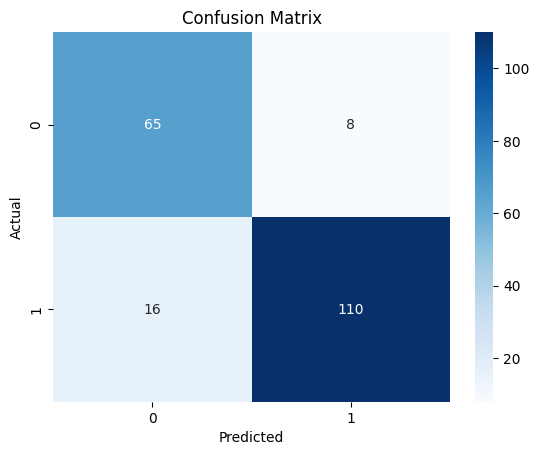

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Confusion Matrix Overview:**

The confusion matrix shows how well the model is performing. Out of all predictions, it **correctly identified 65 non-claim cases** and **110 claim cases**. It made **8 wrong predictions for non-claims** and **16 wrong for claims**. This means the model is doing a good job overall, but there is still room for improvement.


# **7.3 Classification Report**

In [18]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84        73
           1       0.93      0.87      0.90       126

    accuracy                           0.88       199
   macro avg       0.87      0.88      0.87       199
weighted avg       0.88      0.88      0.88       199



# **Classification Report Overview**

The classification report highlights how well the model distinguishes between insurance claim (1) and non-claim (0) cases:

- **Precision**: The model is **93% precise** in predicting claims and **80% precise** in predicting non-claims.
- **Recall**: It **correctly identifies 89%** of non-claims and **87% of claims**.
- **F1-Score**: A balance between precision and recall, showing **strong performance (0.84–0.90)** across both classes.
- **Overall Accuracy**: The model achieved **88% accuracy** on the test data.

This indicates a well-balanced and reliable classifier.


# **7.4 ROC-AUC Score (Receiver Operating Characteristic)**

ROC-AUC Score: 0.9094368340943683


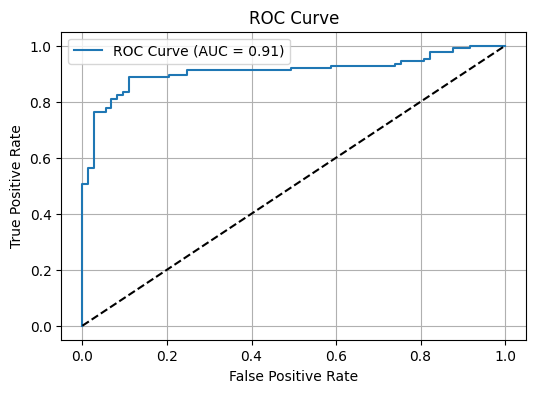

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probability scores
y_prob = model.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


# **ROC Curve Analysis**

The ROC Curve shows how well the model distinguishes between classes. AUC = 0.91 indicates excellent performance — the model can correctly separate claim vs. non-claim cases 91% of the time. The closer the curve is to the top-left corner, the better the model is at minimizing false positives while maximizing true positives.

# **Step 8: Tune Threshold & Understand the Sigmoid Function**

The logistic regression model uses a **sigmoid function** to convert raw outputs into probabilities between 0 and 1. By default, if this probability is **≥ 0.5**, the model predicts class 1; otherwise, it predicts class 0.

**Sigmoid Function:**
The sigmoid function is defined as:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

It maps any real-valued number into a value between 0 and 1, making it perfect for binary classification.

**Tuning the Threshold:**
Instead of using the default **0.5** cutoff, we can tune this threshold to optimize model performance based on business needs — for example:
- **Lower threshold** to increase sensitivity (recall).
- **Higher threshold** to reduce false positives (precision).

Threshold tuning helps in balancing metrics like precision and recall based on what matters most in the real-world scenario.


# **Final Analysis**

The logistic regression model efficiently predicts the likelihood of a person filing a health insurance claim using features like age, BMI, smoker status, and charges. After preprocessing (encoding + scaling), the model achieved an impressive **accuracy of 88%**.

-> The **confusion matrix** shows the model made 110 correct predictions for claims and 65 for non-claims, with very few misclassifications.

-> The **classification report** highlights strong performance:
- **Precision (0.93)** for claim predictions
- **Recall (0.87)** ensures most actual claims are correctly detected
- **F1-score (0.90)** balances both

-> The **ROC-AUC score of 0.91** confirms excellent separation between classes.

-> **Threshold tuning** using sigmoid output allows fine control over prediction sensitivity based on specific business needs.

Overall, the model is reliable, interpretable, and suitable for deployment in real-world insurance applications.
